In [2]:
#1 Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import csv
from sklearn.metrics import r2_score,mean_squared_error
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import BorderlineSMOTE
from imblearn.under_sampling import RandomUnderSampler
from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import make_scorer
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from matplotlib import pyplot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest

In [4]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [3]:
#2 Importing the dataset

dataset = pd.read_csv(r'C:\Users\abhin\OneDrive\Documents\BP-work-ECG-PPG\Kaggle-Dataset-Peaks\All-Data-intervals.csv')


In [4]:
dataset

,R-Peak,Onset,Systolic-Peak,Peaks_BP,PAT_f,PAT_p,Systol,Class
0,76,124,160,122,384,672,132.953652,Normal
1,201,249,285,246,384,672,135.786610,Normal
2,328,386,412,374,464,672,130.413758,Normal
3,453,517,536,498,512,664,133.295561,Normal
4,581,644,665,626,504,672,131.195264,Normal
...,...,...,...,...,...,...,...,...
282,527,590,615,572,504,704,110.289987,Normal
283,622,685,711,666,504,712,111.364558,Normal
284,716,779,805,761,504,712,111.852999,Normal
285,811,875,901,856,512,720,108.531600,Normal


In [5]:
Data=dataset[['PAT_f','Class']]

In [6]:
Data

,PAT_f,Class
0,384,Normal
1,384,Normal
2,464,Normal
3,512,Normal
4,504,Normal
...,...,...
282,504,Normal
283,504,Normal
284,504,Normal
285,512,Normal


In [7]:
# calculate ANOVA test
from scipy.stats import f_oneway
    
#Create the Data Frame
#CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)
#CarData=dataset[['TI1','Hypertension']]
print(Data.head())
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each Class as a list

CategoryGroupLists=Data.groupby('Class')['PAT_f'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

   PAT_f   Class
0    384  Normal
1    384  Normal
2    464  Normal
3    512  Normal
4    504  Normal
P-Value for Anova is:  0.01683556482805917


In [8]:
Data2=dataset[['PAT_p','Class']]

In [9]:
# calculate ANOVA test
from scipy.stats import f_oneway
    
#Create the Data Frame
#CarData=pd.DataFrame(data=DataValues,columns=ColumnNames)
#CarData=dataset[['TI1','Hypertension']]
print(Data2.head())
########################################################
# f_oneway() function takes the group data as input and 
# returns F-statistic and P-value
from scipy.stats import f_oneway
 
# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated
 
# Finds out the Prices data for each FuelType as a list
#CategoryGroupLists=CarData.groupby('FuelType')['CarPrice'].apply(list)
CategoryGroupLists=Data2.groupby('Class')['PAT_p'].apply(list)
 
# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

   PAT_p   Class
0    672  Normal
1    672  Normal
2    672  Normal
3    664  Normal
4    672  Normal
P-Value for Anova is:  1.3512427591682674e-20


In [10]:
# calculate kendall's correlation
from scipy.stats import kendalltau
coef1, p1 = kendalltau(dataset['Class'],dataset['PAT_f'])
print('Kendall correlation coefficient: %.3f' % coef1)
print('Kendall correlation coefficient: %.3f' % p1)
# interpret the significance
alpha = 0.05
if p1 > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p1)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p1)
    
coef2, p2 = kendalltau(dataset['Class'],dataset['PAT_p'])
print('Kendall correlation coefficient: %.3f' % coef2)
print('Kendall correlation coefficient: %.3f' % p2)
# interpret the significance
alpha = 0.05
if p2 > alpha:
	print('Samples are uncorrelated (fail to reject H0) p=%.3f' % p2)
else:
	print('Samples are correlated (reject H0) p=%.3f' % p2)

Kendall correlation coefficient: 0.348
Kendall correlation coefficient: 0.000
Samples are correlated (reject H0) p=0.000
Kendall correlation coefficient: 0.612
Kendall correlation coefficient: 0.000
Samples are correlated (reject H0) p=0.000


In [11]:
dataset['Class'].value_counts()

Hypertension    148
Normal          139
Name: Class, dtype: int64

In [12]:
dataset.describe()

,R-Peak,Onset,Systolic-Peak,Peaks_BP,PAT_f,PAT_p,Systol
count,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000,287.000000
mean,512.087108,564.864111,592.156794,560.027875,422.216028,640.557491,134.677994
std,277.254855,276.839036,276.534725,278.163758,95.497201,61.015383,17.430451
min,39.000000,40.000000,113.000000,83.000000,0.000000,336.000000,105.845174
25%,279.000000,334.000000,357.500000,322.000000,384.000000,608.000000,111.730889
50%,513.000000,573.000000,594.000000,559.000000,440.000000,632.000000,141.159461
75%,751.500000,809.500000,833.500000,806.000000,496.000000,688.000000,148.827986
max,992.000000,1043.000000,1083.000000,1039.000000,688.000000,856.000000,167.092612


In [13]:
dataset.head()

,R-Peak,Onset,Systolic-Peak,Peaks_BP,PAT_f,PAT_p,Systol,Class
0,76,124,160,122,384,672,132.953652,Normal
1,201,249,285,246,384,672,135.786610,Normal
2,328,386,412,374,464,672,130.413758,Normal
3,453,517,536,498,512,664,133.295561,Normal
4,581,644,665,626,504,672,131.195264,Normal


In [14]:
feature_cols = ['PAT_f', 'PAT_p' ]

In [15]:
X = dataset.iloc[:,4:6] # Features

In [16]:
X

,PAT_f,PAT_p
0,384,672
1,384,672
2,464,672
3,512,664
4,504,672
...,...,...
282,504,704
283,504,712
284,504,712
285,512,720


In [17]:
y = dataset['Class'] # Target variable

In [18]:
y

0      Normal
1      Normal
2      Normal
3      Normal
4      Normal
        ...  
282    Normal
283    Normal
284    Normal
285    Normal
286    Normal
Name: Class, Length: 287, dtype: object

In [19]:
y,class_names = pd.factorize(y)

In [20]:
class_names

Index(['Normal', 'Hypertension'], dtype='object')

In [21]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,stratify=y) # 70% training and 30% test

In [22]:
# feature selection using ANOVA f-test Feature Selection  ## https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 3.278692
Feature 1: 76.241468


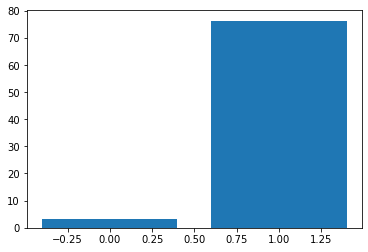

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train, X_test, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [24]:
# feature selection Mutual Information Feature Selection ### https://machinelearningmastery.com/feature-selection-with-numerical-input-data/

def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 0.548635
Feature 1: 0.447460


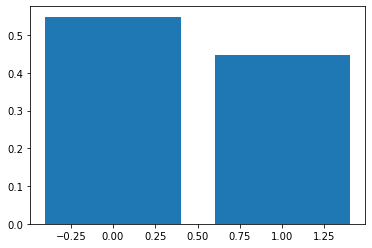

In [25]:
from sklearn.feature_selection import mutual_info_classif

# load the dataset
#X, y = load_dataset('pima-indians-diabetes.csv')
# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

#print(fs.pvalues)

In [26]:
X_train

array([[264, 656],
       [504, 712],
       [504, 704],
       [368, 608],
       [456, 608],
       [360, 608],
       [448, 608],
       [448, 600],
       [464, 616],
       [496, 696],
       [384, 536],
       [376, 592],
       [440, 624],
       [520, 672],
       [520, 720],
       [376, 488],
       [416, 632],
       [176, 624],
       [216, 648],
       [440, 632],
       [400, 608],
       [392, 600],
       [440, 624],
       [ 72, 480],
       [176, 448],
       [504, 712],
       [440, 624],
       [424, 640],
       [160, 640],
       [440, 624],
       [448, 632],
       [504, 712],
       [480, 688],
       [392, 608],
       [200, 656],
       [264, 640],
       [504, 712],
       [464, 608],
       [408, 608],
       [440, 600],
       [440, 632],
       [520, 720],
       [512, 664],
       [456, 616],
       [504, 704],
       [512, 720],
       [504, 712],
       [512, 712],
       [432, 600],
       [440, 624],
       [520, 720],
       [456, 616],
       [432,

In [27]:
y_train

array([0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       1, 1], dtype=int64)

In [28]:
# Create Decision Tree classifer object
classifier = DecisionTreeClassifier(criterion='entropy', random_state=42)  ## without depth
# Train Decision Tree Classifer
classifier = classifier.fit(X_train,y_train)

In [41]:
# Model performance on training set
y_pred_train =classifier.predict(X_train)

from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

accuracy = metrics.accuracy_score(y_train, y_pred_train)
print("Accuracy: {:.2f}".format(accuracy))

cm=confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix: \n', cm)
print(classification_report(y_train, y_pred_train, target_names=class_names))

Accuracy: 1.00
Confusion Matrix: 
 [[ 97   0]
 [  0 103]]
              precision    recall  f1-score   support

      Normal       1.00      1.00      1.00        97
Hypertension       1.00      1.00      1.00       103

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [42]:
# Predicting the test results
y_pred=classifier.predict(X_test)

# Classification results on test set
from sklearn import metrics
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}".format(accuracy))

from sklearn.metrics import confusion_matrix, classification_report
cm=confusion_matrix(y_test,y_pred)
print('Confusion Matrix: \n', cm)
print(classification_report(y_test, y_pred, target_names=class_names))

Accuracy: 0.92
Confusion Matrix: 
 [[38  4]
 [ 3 42]]
              precision    recall  f1-score   support

      Normal       0.93      0.90      0.92        42
Hypertension       0.91      0.93      0.92        45

    accuracy                           0.92        87
   macro avg       0.92      0.92      0.92        87
weighted avg       0.92      0.92      0.92        87



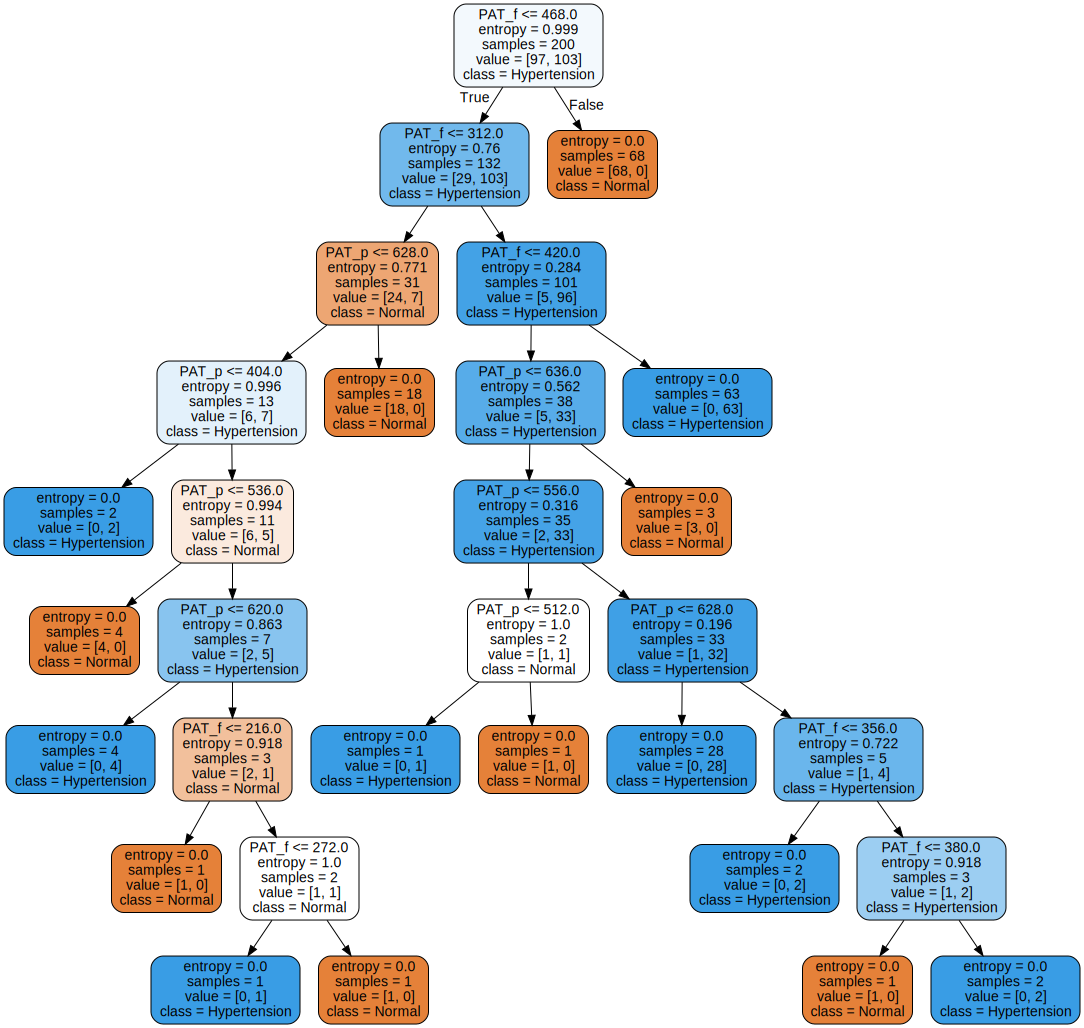

In [32]:
# Visualize the tree by graphiz
import graphviz
from sklearn import tree
#feature_names = ['Systole period', 'Diastole period', 'Systole Peak-Diastole Peak', 'Systole Peak-Dicrotic Notch','Dicrotic Notch-Diastolic Peak','Dicrotic Notch-Onset','Diastolic Peak-Onset','Pulse interval','Systolic Peak-Systolic Peak']
feature_names = ['PAT_f','PAT_p']
dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
graph = graphviz.Source(dot_data)
graph

In [37]:
from sklearn.tree import _tree

def tree_to_code(tree, feature_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    print ("def tree({}):".format(", ".join(feature_names)))

    def recurse(node, depth):
        indent = "  " * depth
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print ("{}if {} <= {}:".format(indent, name, threshold))
            recurse(tree_.children_left[node], depth + 1)
            print ("{}else:  # if {} > {}".format(indent, name, threshold))
            recurse(tree_.children_right[node], depth + 1)
        else:
            print ("{}return {}".format(indent, np.argmax(tree_.value[node][0])))

    recurse(0, 1)

In [38]:
tree_to_code(classifier, dataset.columns[4:6])

def tree(PAT_f, PAT_p):
  if PAT_f <= 468.0:
    if PAT_f <= 312.0:
      if PAT_p <= 628.0:
        if PAT_p <= 404.0:
          return 1
        else:  # if PAT_p > 404.0
          if PAT_p <= 536.0:
            return 0
          else:  # if PAT_p > 536.0
            if PAT_p <= 620.0:
              return 1
            else:  # if PAT_p > 620.0
              if PAT_f <= 216.0:
                return 0
              else:  # if PAT_f > 216.0
                if PAT_f <= 272.0:
                  return 1
                else:  # if PAT_f > 272.0
                  return 0
      else:  # if PAT_p > 628.0
        return 0
    else:  # if PAT_f > 312.0
      if PAT_f <= 420.0:
        if PAT_p <= 636.0:
          if PAT_p <= 556.0:
            if PAT_p <= 512.0:
              return 1
            else:  # if PAT_p > 512.0
              return 0
          else:  # if PAT_p > 556.0
            if PAT_p <= 628.0:
              return 1
            else:  # if PAT_p > 628.0
              if 

In [39]:
def get_rules(tree, feature_names, class_names):
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]

    paths = []
    path = []
    
    def recurse(node, path, paths):
        
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            p1, p2 = list(path), list(path)
            p1 += [f"({name} <= {np.round(threshold, 3)})"]
            recurse(tree_.children_left[node], p1, paths)
            p2 += [f"({name} > {np.round(threshold, 3)})"]
            recurse(tree_.children_right[node], p2, paths)
        else:
            path += [(tree_.value[node], tree_.n_node_samples[node])]
            paths += [path]
            
    recurse(0, path, paths)

    # sort by samples count
    samples_count = [p[-1][1] for p in paths]
    ii = list(np.argsort(samples_count))
    paths = [paths[i] for i in reversed(ii)]
    
    rules = []
    for path in paths:
        rule = "if "
        
        for p in path[:-1]:
            if rule != "if ":
                rule += " and "
            rule += str(p)
        rule += " then "
        if class_names is None:
            rule += "response: "+str(np.round(path[-1][0][0][0],3))
        else:
            classes = path[-1][0][0]
            l = np.argmax(classes)
            rule += f"class: {class_names[l]} (proba: {np.round(100.0*classes[l]/np.sum(classes),2)}%)"
        rule += f" | based on {path[-1][1]:,} samples"
        rules += [rule]
        
    return rules

In [44]:
rules = get_rules(classifier, feature_names, class_names)
for r in rules:
    print(r)

if (PAT_f > 468.0) then class: Normal (proba: 100.0%) | based on 68 samples
if (PAT_f <= 468.0) and (PAT_f > 312.0) and (PAT_f > 420.0) then class: Hypertension (proba: 100.0%) | based on 63 samples
if (PAT_f <= 468.0) and (PAT_f > 312.0) and (PAT_f <= 420.0) and (PAT_p <= 636.0) and (PAT_p > 556.0) and (PAT_p <= 628.0) then class: Hypertension (proba: 100.0%) | based on 28 samples
if (PAT_f <= 468.0) and (PAT_f <= 312.0) and (PAT_p > 628.0) then class: Normal (proba: 100.0%) | based on 18 samples
if (PAT_f <= 468.0) and (PAT_f <= 312.0) and (PAT_p <= 628.0) and (PAT_p > 404.0) and (PAT_p > 536.0) and (PAT_p <= 620.0) then class: Hypertension (proba: 100.0%) | based on 4 samples
if (PAT_f <= 468.0) and (PAT_f <= 312.0) and (PAT_p <= 628.0) and (PAT_p > 404.0) and (PAT_p <= 536.0) then class: Normal (proba: 100.0%) | based on 4 samples
if (PAT_f <= 468.0) and (PAT_f > 312.0) and (PAT_f <= 420.0) and (PAT_p > 636.0) then class: Normal (proba: 100.0%) | based on 3 samples
if (PAT_f <= 468